In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("hw6.ipynb")

# Midterm Project: Exploring USA County Health Rankings and Roadmaps

### Collaborators and Sources
In addition to recording your **collaborators** (TAs, peers, group members, roommates, etc.) on this homework in the cell below, you are required to **cite/indicate all external sources** used when finishing this assignment. 
External sources are defined as anything that is not considered course material, such as online sources (webpages, blog posts, etc.), content generated by AI systems, books, etc.

When using external sources, indicate what kind of external sources (e.g. stack overflow, WashU chatGPT, etc.) you used in the cell below and then provide more specific citations (such as links to webpages or in case of AI generated asnwers the actual sources (links provided by the AI system) and the prompt used to generate the answers) with your answer to **each specific problem**.  


Note that these citations will not free you from your obligation to submit your _own_ code and write-ups, however, they will be taken into account during the grading and regrading process, **especially** when two or more submissions closely resemble each other. Working with each other is ok, as long as you cite who you worked with and you don't copy anyone's answers directly!

### Submission instructions
* Submit this Python notebook on Gradescope.
* Execute all cells and save your notebook prior to submission. 
* Don't forget to commit and push to your Github repo!
* **Do not change the number of cells!** Your submission notebook should have exactly one code cell per problem. 
* Do **not** remove the `# your code here` line. Add your solution **after** that line. 

### Submission instructions
* Submit this Python notebook, including your answers in the code cells as homework submission.
* **Feel free to add as many cells as you need to** — just make sure you don't change what we gave you. 
* **Does it spark joy?** Note that you will be partially graded on the presentation (_cleanliness, clarity, comments_) of your notebook so make sure you [Marie Kondo](https://lifehacker.com/marie-kondo-is-not-a-verb-1833373654) your notebook before submitting it.

## 1. Introduction

We are using the 2024 County Health Release National Data compiled and curated by the County Health Rankings & Roadmaps (CHR&R), a program of the University of Wisconsin Population Health Institute. It provides data at the county-level to enable analysis of the reasons for the differences in health within each community and across communities. (https://www.countyhealthrankings.org/).

For our midterm project this semester, the data (analytic_data2024.csv) and the data dictionary is already stored in this box folder (https://wustl.box.com/s/6sobk3ae12bup7ccp29y964q1pyuu0l7) for your convinence or you can also download it from https://www.countyhealthrankings.org/health-data/methodology-and-sources/data-documentation (2024 CHR CSV Analytic Data)

Our goal will be to use the clean dataset (analytic_data2024.csv) to gain some insight about US County Health Rankings & Roadmaps (CHR&R) characteristics and (_hopefully_) find some patterns in this data.

In general, we will be following the EDA process:
1. Get the data and gain **basic understanding**
2. **Wrangle** the data
3. **Profile** the data
4. Develop questions to investigate (form a **hypotheses**)
5. Use the data to **investigate** hypothesis
6. **Summarize** results and answer questions 
7. **Critically review** our workflow and discuss ethical concerns

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from utility.util import configure_plots
import seaborn as sns

configure_plots()

# Load dataset
data = pd.read_csv("./utility/data/analytic_data2024.csv")
#data

C:\Users\harri\AppData\Local\Temp\ipykernel_17440\2018375564.py:13: DtypeWarning: Columns (0,1,2,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255

## 2. Getting Familiar with the Data

In this section, we will get a feel for our data and tidy it up so that we can analyize it later. 
Download the data from the source/link given above and be sure to save the data in a folder called `data` under the `utility` directory. Your final path should look like `utility/data/analytic_data2024.csv` -- if it doesn't **we will not be able to properly grade your assignment!**



<!-- BEGIN QUESTION -->

### Problem 1

Let's start by taking a look at our data and the README that includes essential information for the data. 

**Write-up!** Describe the data, answering questions including, but not limited to, these: Where does the data come from? How was it obtained? How many examples (rows) and features (columns) does the dataset have? What kinds of features are in the dataset -- numerical  (discrete/continuous) or categorical(ordinal/nominal)? What range of values does each feature  take? List five or more features you find the most relevant and would like to explore further. 
> **Hint**: Consider the steps of EDA; what would you like to know about this dataset. 

**Where does the data come from? How was it obtained?**

The data comes from County Health Rankings & Roadmaps, an organization that measures the health of counties across the nation and compiles national and state data sources. County Health Rankings & Roadmaps uses topic areas from the University of Wisconsin Population Health Institute Model of Health to make their collection of over 80 measures of health. County Health Rankings & Roadmaps' Health Groups,  Population Health and Well-being (Length of Life, Quality of Life) and Community Conditions (Health Infrastructure, Physical Environment, Social and Economic Factors), are constructed annually. For each county with available data, County Health Rankings & Roadmaps computes two summary scores, Population Health and Well-being summary scores with 50% weight for Length of Life and 50% weight for Quality of Life, and Community Condition summary scores with 25% weight for Health Infrastructure,  25% weight for Physical Environment, and 50% weight for Social and Economic Factors. These summary scores are assigned to one of ten groups nationally using a data-informed grouping method that groups counties based on similarity and meaningful gaps in the data. The scores for the two Health Groups are sorted separately into ten unequally-sized groups ranging from least healthy to most healthy counties across the nation, where a county in the first group is among the healthiest in the nation and a county in the tenth group is among the least healthy. Not each state will have counties in each of the ten groups. This data provides a health snapshot for counties, indicating how a county compares to other counties in its state and the nation. Where a county has enough data to be assigned to a Health Group but still has missing data, County Health Rankings & Roadmaps assigns the average of state Z-scores from counties in that state that have data for that measure.

The University of Wisconsin Population Health Institute Model of Health uses “Premature Death” as a life span measure. The National Center for Health Statistics (NCHS) provides birth and death data drawn from the National Vital Statistics System (NVSS). County Health Rankings & Roadmaps requests this data, also to report “Low Birth Rate.” Data is submitted to the NVSS by systems equally responsible for registering vital events like births, deaths, marriages, divorces, and fetal deaths. Most calculations of mortality rates can be directly downloaded from CDC Wonder, but the County Health Rankings & Roadmaps compute “Premature Death” and “Life Expectancy” from raw data files. Additionally, CDC WONDER does not report data for all counties per their missing data criteria. County Health Rankings & Roadmaps also uses the NCHS and NVSS, as well as the Census Bureau’s Population Estimates Program (PEP), to compute “Injury Deaths.” Injury Deaths is the number of deaths that result from injuries per 100,000 people, including intentional and unintentional causes. County Health Rankings & Roadmaps combines multiple data files in ArcGIS Pro to report “Access to Exercise Opportunities,” such as USA Parks data. The YMCA provides CHRR with a national file identifying YMCA locations with opportunities for physical activity. “Access to Exercise Opportunities” measures the percentage of individuals in a county who live reasonably close to a location for physical activity, defined as parks or recreational facilities. County Health Rankings & Roadmaps computes the feature “Mental Health Providers” by using the National Plan and Provider Enumeration System (NPPES) downloadable file containing all active and inactive National Provider Identifier (NPI) records. The active NPI’s contain data for the provider's name, specialty, and practice address. “Mental Health Providers” is the ratio of the population to mental health providers. County Health Rankings & Roadmaps collects data from over 60 sources, such as the American Medical Association, American Hospital Association, U.S. Census Bureau, Centers for Medicare & Medicaid Services, Bureau of Labor Statistics, and National Center for Health Statistics, compiled into the Area Health Resource File to compute the Clinical care measure “Dentists,” a ratio of the population to dentists. County Health Rankings & Roadmaps uses the CDC's National Environmental Public Health Tracking Network, data provided by the Environmental Public Health Tracking (EPHT) Network, monitoring data comes from the U.S. Environmental Protection Agency (EPA) Air Quality System (AQS), and other government agencies to track air pollution. The Air Pollution: Particulate Matter measure is created based on air pollution data from monitors and modeled estimates. County Health Rankings & Roadmaps determines race categories using the race and ethnicity categories presented in the Annual Data Release. County Health Rankings & Roadmaps uses the following data sources to compute race features: National Center for Health Statistics (NCHS), American Community Survey (ACS), Center for Medicare and Medicaid Services, and Stanford Education Data Archive, which follows the National Center for Education Statistics (NCES).

**How many examples (rows) and features (columns) does the dataset have?**

County Health Rankings & Roadmaps selected five measures to include in the summary score for Population Health and Well-being and 29 measures to include in the summary score for Community Conditions. The 2024 CHR CSV Analytic Data contains 770 features (columns) and 3195 entries (rows).

**What kinds of features are in the dataset -- numerical (discrete/continuous) or categorical(ordinal/nominal)? What range of values does each feature take?**

The dataset include both numerical and categorical features. For example, "State Abbreviation" is categorical-nominal. The "State Abbreviation" feature is ordered alphabetically, ranging from AL (Alabama) to WY (Wyoming). "5-digit FIPS code" is categorical-nominal, ranging from 01001 to 56045. There are also numerical features, for example, Population which is discrete-numerical, ranging from 2428 to 9721138, and Non-Hispanic White which is continuous-numerical, ranging from 0.028404 to 0.9754. 

**List five or more features you find the most relevant and would like to explore further.**

The feature we find most relevant is "Voter Turnout," as this feature is representative of how well a county's local politicians value their constituents. Voter turnout has demographic patterns across race and socio-economic status, as white and wealthy homeowners are most likely to vote and have the power to push back on public problems. All of these factors are captured in the data set, so we think "Voter Turnout" is a very relevant feature to the data set. 

In addition to Voter Turnout, another feature that indicates a population's political power is "Homeownership." A county's population's homeownership proportions have valuable implications for the population's income and political involvement. Local politicians are more likely to value their constituents who own their homes, as these people are more "permanent" and valuable to their campaign. Local politicians would care more for constituents with political power and privileges that would enable people to complain or push back on infrastructural problems, and care less for counties with low homeownership, as those people are less likely to have the political connections to make valuable complaints that could hurt their campaign image or chances of re-election. 

Therefore, "Voter Turnout" and "Homeownership" could serve as our dependent variables, and we could use features that represent infrastructural problems as our independent variables, testing how areas with higher or lower public problems correspond to the county's perceived political power.

We would like to explore the features "Air Pollution - Particulate Matter" and "Drinking Water Violations" as these measure public health and could be used for evidence of infrastructural discrimination. We are interested in how factors that measure a county's environmental and health hazards affect measures that indicate a population's political power.

Two more features we are interested in using as independent variables to measure a county's public health are "Severe Housing Problems" and "Limited Access to Healthy Foods." It is incredibly unjust that local politicians make less effort to serve their constituents with less political power, and we want to uncover these patterns as evidence of infrastructural discrimination, perpetuating a cycle where less privileged counties suffer public health problems and lose the resources and motivation to be politically active. 

We are aware of the race-based and class-based discrimination that very well corresponds to infrastructural discrimination, but for the sake of this project, we will limit our scope to environmental hazards and how they reflect measures of political power.

### Problem 2

Data cleaning and processing: Let's do some data wrangling. 

**Write up!** Considering your description of the dataset from [Problem 1](#Problem-1), how should we clean this data?

Here are some initial instructions to get you started and feel free to do further cleaning if it makes sense for your data analytics:
- Retain only the following columns: 'State FIPS Code', 'County FIPS Code', '5-digit FIPS Code', 'Name', 'State Abbreviation', 'Release Year' and all the '*_raw value'. Report any changes in data size or shape after each update or reduction.
> **Hint** You can use the `endswith()` function or regex to get the column names that end with a specific suffix.
- Remove the rows corresponding to the aggregate values for the entire US and one for each state and District of Columbia. **These rows have a “County FIPS Code” value of “000”.**
- Remove columns where over 10% of the values are missing values. This should bring the number of columns down to ~75.
> **Hint** Use the `df.dropna(axis=1, thresh=n)` method, where n is the minimum number of non-missing values a column must have to be retained. Given that a column should have at least 90% of its values present, how would you determine `n`?

- Keep only complete rows, i.e., remove rows with any missing value.
- Feel free to rename the columns, making them more meaningful.
- Drop the first row of the dataset.
- Covert the '*_raw value' columns to a numeric data type.
> **Hint** Use `lambda` and `pd.to_numeric`
- Based on the goals of your project, feel free to get rid of more features to keep your dataset more aligned with your project goals and further analysis.

**Do this!** In the cells below, **explain** and perform the steps that you need to prepare this data for further analysis. Make sure that your implementations and write-ups (for processing and analysis) are presented well and effectively describe your workflow. You should add comments and markdown cells for your documentation as you see fit!  


*Grading Note: Your work will be graded for _readability_, _style_, and _cleanlines_. So, carefully document your code and use descriptive/intuitive variable names. For write-ups use consice and clear language like in a written project report.*

> **Hint**: You can use our previous labs as examples of how you might do this. 
Also, you might want to come back to this step later on, since you might encounter problems with the data once you actually analyze it. Remember, you may add as many cells (for code and text) as you need below. Here — we gave you one for free!

**Answer here:** (feel free to make multiple cells!)  

In [3]:
# this one is free!
#3196 rows x 770 columns

#removing columns not needed, keeping raw value columns plus 6 other columns
data = data.loc[:, data.columns.str.endswith('raw value') | data.columns.isin(['State FIPS Code', 'County FIPS Code', '5-digit FIPS Code', 'Name', 'State Abbreviation', 'Release Year'])]

#removing string '000' and int 000 (the US, 50 States, and Washington DC)
data = data[data['County FIPS Code'] != 000]
data = data[data['County FIPS Code'] != '000']

#dropping columns with too much missing data (over 10% of data in column empty)
data = data.dropna(axis=1, thresh=.9*(len(data)))

#dropping rows with any missing data
data = data.dropna(axis=0)

#removing row 0, which contains column names
data = data.drop([0])

#converting numeric data to numeric data type
raw_columns = data.columns[data.columns.str.endswith('raw value')]
data[raw_columns] = data[raw_columns].apply(pd.to_numeric)
numeric_columns = ['State FIPS Code', 'County FIPS Code', '5-digit FIPS Code', 'Release Year']
data[numeric_columns] = data[numeric_columns].apply(pd.to_numeric)

#removing ' raw value' from raw value columns for cleaner column names
data.columns = data.columns.str.removesuffix(' raw value')
pd.set_option('display.max_columns', None)
data
#2449 rows x 75 columns

,State FIPS Code,County FIPS Code,5-digit FIPS Code,State Abbreviation,Name,Release Year,Premature Death,Poor or Fair Health,Poor Physical Health Days,Poor Mental Health Days,Low Birthweight,Adult Smoking,Adult Obesity,Food Environment Index,Physical Inactivity,Access to Exercise Opportunities,Excessive Drinking,Alcohol-Impaired Driving Deaths,Sexually Transmitted Infections,Teen Births,Uninsured,Primary Care Physicians,Dentists,Mental Health Providers,Preventable Hospital Stays,Mammography Screening,Flu Vaccinations,High School Completion,Some College,Unemployment,Children in Poverty,Income Inequality,Children in Single-Parent Households,Social Associations,Injury Deaths,Air Pollution - Particulate Matter,Drinking Water Violations,Severe Housing Problems,Driving Alone to Work,Long Commute - Driving Alone,Life Expectancy,Premature Age-Adjusted Mortality,Frequent Physical Distress,Frequent Mental Distress,Diabetes Prevalence,Food Insecurity,Limited Access to Healthy Foods,Insufficient Sleep,Uninsured Adults,Uninsured Children,Other Primary Care Providers,School Segregation,School Funding Adequacy,Gender Pay Gap,Median Household Income,Child Care Cost Burden,Child Care Centers,Voter Turnout,Census Participation,Traffic Volume,Homeownership,Severe Housing Cost Burden,Broadband Access,Population,% Below 18 Years of Age,% 65 and Older,% Non-Hispanic Black,% American Indian or Alaska Native,% Asian,% Native Hawaiian or Other Pacific Islander,% Hispanic,% Non-Hispanic White,% Not Proficient in English,% Female,% Rural
3,1,1,1001,AL,Autauga County,2024,9407.948438,0.173,3.910265,5.703204,0.098713,0.169,0.389,6.7,0.291,0.544920,0.152378,0.290909,577.0,20.908880,0.100186,0.000440,0.000301,0.000368,3915.0,0.40,0.37,0.904026,0.641475,0.022696,0.157,4.637675,0.227025,12.691429,68.033478,10.0,0.0,0.153757,0.854278,0.429,75.263497,472.283923,0.117,0.180,0.107,0.133,0.130210,0.375,0.124074,0.040412,0.000502,0.051539,-3606.782000,0.746166,70148,0.197340,5.726341,0.661821,0.688,46.473848,0.754528,0.112794,0.890667,59759,0.232283,0.164109,0.210111,0.004719,0.011781,0.001222,0.033819,0.720511,0.003665,0.512960,0.406768
4,1,3,1003,AL,Baldwin County,2024,8981.575353,0.152,3.730943,5.373666,0.081243,0.150,0.372,7.5,0.276,0.631293,0.164226,0.361446,317.6,20.202237,0.109971,0.000627,0.000471,0.001104,2799.0,0.44,0.42,0.915993,0.656804,0.023500,0.161,4.482449,0.190513,9.653397,77.507985,7.6,1.0,0.124279,0.813470,0.379,76.738314,416.218912,0.110,0.173,0.098,0.118,0.079368,0.351,0.133762,0.049369,0.000836,0.090946,-537.153300,0.722549,71704,0.201523,6.231824,0.652909,0.564,39.068067,0.778705,0.123019,0.889209,246435,0.208039,0.219287,0.082249,0.008108,0.011561,0.000665,0.050362,0.829785,0.007867,0.512391,0.375865
5,1,5,1005,AL,Barbour County,2024,13138.848362,0.273,5.023488,6.014294,0.122725,0.250,0.434,6.0,0.402,0.548547,0.122772,0.314286,729.0,36.618539,0.126776,0.000401,0.000324,0.000283,3040.0,0.42,0.35,0.764922,0.404545,0.040650,0.377,5.576797,0.506605,8.412113,85.215853,9.4,0.0,0.150751,0.820525,0.367,72.377024,628.253596,0.158,0.205,0.156,0.178,0.104332,0.439,0.163115,0.038976,0.000810,0.038890,-23626.580000,0.777443,41151,0.254599,5.303030,0.540216,0.545,34.405649,0.649734,0.107663,0.682232,24706,0.203635,0.206225,0.471950,0.007245,0.004695,0.002793,0.051000,0.452724,0.019807,0.471222,0.659200
6,1,7,1007,AL,Bibb County,2024,12675.434581,0.220,4.552795,5.824583,0.098286,0.220,0.396,7.6,0.360,0.433903,0.147858,0.153846,662.9,31.922979,0.113799,0.000667,0.000227,0.000500,4651.0,0.36,0.28,0.788634,0.389935,0.025097,0.255,5.669237,0.307134,8.897985,99.933081,9.8,0.0,0.122590,0.879836,0.538,72.251369,618.323859,0.140,0.194,0.124,0.149,0.004459,0.400,0.140821,0.039497,0.001409,0.089802,-6970.646000,0.808806,54309,0.237014,5.016722,0.545635,0.560,8.146790,0.757345,0.104043,0.797118,22005,0.197455,0.178050,0.207362,0.005726,0.002908,0.001318,0.031766,0.739968,0.002892,0.464894,1.000000
7,1,9,1009,AL,Blount County,2024,11541.495069,0.186,4.246335,5.664851,

### Problem 3

Formulating and Answering Questions Through Analysis and Visualizations 

**Do this!** Now that we cleaned up our data, we are ready to look into it. In this problem, we want to profile our data and explore its variables.

> **Hint**: Note that the way some data is stored does not necesarily mean that each column should correspond to a seperate variable. Feel free to define your own variables based on the input data. Looking at the dataset documentation (data dictionary) might be helpful to figure out meaningful representations. Also note that there are no right or wrong representations here (since it is your job to find something interesting in the data, it is also up to you to choose the data/variable representations). Again, you might want to iterate over this step again later after doing some more exploration. 

> **Hint**: Recall from Lab 2, this step usually involves computing summary statistics and basic plots _where applicable_. Try plotting some of the data (with appropriate plots; remember the lecture content - some plots introduced in there ( we did not yet use in the lab or hw) could be useful). Then, highlight a few of the more interesting ones and discuss why you thought they were interesting — for both our sakes, **please only include the most interesting ones** in your actual submission!!  Again note that there are no right or wrong features to choose here (since it is your job to find something interesting in the data, it is also up to you to choose the data/variables to include). Just be sure to make a selection. You will not receive any credit by simply plotting everything!  

*Grading Note*: Your work will be graded for _creativity_ and _aesthetics_. Be creative in the plots you use and select visulatizations and colors that make for a plesant and intuitive viewing expereince. The goal of a good visualization is that the viewer will quickly understand your figures.* 

Once again, we have provided a _free_ cell for you to use; make as many as you need. Use text/markdown cells to describe what you are doing and what your findings are. 

In [4]:
data[['5-digit FIPS Code', 'Population', '% Non-Hispanic White']].describe() # Used for question 1, describing different features and their ranges in the dataset.

,5-digit FIPS Code,Population,% Non-Hispanic White
count,2449.000000,2.449000e+03,2449.000000
mean,29994.712536,1.222720e+05,0.753160
std,15041.716379,3.579260e+05,0.188881
min,1001.000000,2.428000e+03,0.028404
25%,18121.000000,1.724000e+04,0.638448
50%,29069.000000,3.503300e+04,0.814895
75%,42097.000000,8.956300e+04,0.907272
max,56045.000000,9.721138e+06,0.975400


In [5]:
infrastructural_discrimination = ['Air Pollution - Particulate Matter', 'Drinking Water Violations', 'Severe Housing Problems', 'Limited Access to Healthy Foods']

## 3. Asking the Hard Questions

By now we should know all of the ins and outs about this dataset (right?). Let's dive a little deeper into it and see if we can find anything interesting.

### Problem 4

As you worked through the initial data processing and understanding phase, did anything catch your interest? Let's formulate some questions and hypotheses that you could explore in depth.

**Write-up!** Formulate and describe a question you have/want to investigate. Then, formulate and describe a hypothesis that can (possibly) answer it. What inspired your idea (provide specifics from [the last section](#2.-Getting-Familiar-with-the-Data), if any)? How can you use the data to support or reject your hypothesis?

> **Hint**: Your question/hypothesis might be something that you are personally interested in or something that you think might lead to a product or service for users/customers. You might want to think about something that could help others in making decisions, etc.

*Grading Note: Your work will be graded for _creativity_. Be creative in the questions you ask/hypothesis you pose.* 

**Answer here:** (feel free to make multiple cells!)

**Formulate and describe a question you have/want to investigate.**

How do measures of infrastructural security and public health affect measures of a county's political power?

**Then, formulate and describe a hypothesis that can (possibly) answer it.**

On average, if a county has worse infrastructure, then it will have lower voter turnout and homeownership proportions.

**What inspired your idea (provide specifics from the last section, if any)?**

After we looked at and considered the data, one of the topics we thought about was infrastrucural discrimination. We noticed that the data had features that highlight pollution, water sanitation, housing issues, and access to food. We believe these aspects are low in many communities due to infrastructual discrimination: the development of infrastructure that systemically and/or intentionally creates unequal outcomes, disproportionally affecting low-income communities or communities of color. We were also interested in the voter turnout across counties, which is stored as its own variable in the dataset, as well as homeownership proportions. We decided on the question: How do measures of a county's infrastructural security and public health affect measures of political power? Our hypothesis is that on average, if a county has lower infrastructural security and environmental hazards, then it will have lower voter turnout and homeownership. Our thoughts are that communities that have been negatively impacted by infrastructural discrimination do not have faith in the government to help them, causing them to be less likely to vote due to a lack of political efficacy. We also think these groups who are affected by environmental racism will exhibit lower means of political power, which we are measuring with homeownership. 

**How can you use the data to support or reject your hypothesis?**

1. We will run a linear regression with these four variables ("Air Pollution - Particulate Matter," "Drinking Water Violations," "Severe Housing Problems," and "Limited Access to Healthy Foods") and the target variable "Voter Turnout."
2. We will run a linear regression with these four variables ("Air Pollution - Particulate Matter," "Drinking Water Violations," "Severe Housing Problems," and "Limited Access to Healthy Foods") and the target variable "Homeownership."
3. We will use statistical computations to evaluate how well the independent variables in our data set capture the variation in our dependent variables, and use these measures to evaluate our hypothesis.
4. We will determine the correlations of each IV with our DVs to understand which features are most important to our targets.

### Problem 5

**Do this!** Let's explore your hypothesis. Find evidence from the data that supports or refutes your hypothesis and present it — recall that as a data scientist, one of your goals is to discover and communicate your results to your audience, _me_. The more thorough your analysis, the better!

> **Hint**: Even though we focus on EDA here, you may include some predictive modeling here as well. 

Here's yet another _free_ cell; use as many as you need.

# Voter Turnout 

**Linear Regression for Voter Turnout**

In [6]:
X = data[infrastructural_discrimination]
y1 = data['Voter Turnout']
X_train, X_test, y1_train, y1_test = train_test_split(X, y1, test_size = .1, random_state = 71)

In [7]:
model = LinearRegression()
model.fit(X_train, y1_train)

LinearRegression()

To begin our training phase we take in our four regressors, 'Air Pollution - Particulate Matter', 'Drinking Water Violations', 'Severe Housing Problems', 'Limited Access to Healthy Foods' within the infrastructural discrimination data subset, as well as our target feature 'Voter Turnout'. We conduct a train-test-split with a test size of 0.1, which means that we are going train our model with 90% of the input data (~2200 entries). We set our model to linear regression, and fit our training data to the model.

In [8]:
y1_pred = model.predict(X_test)

Our test phase involves determining predicted y-yalues from our testing data. We use our linear regression model that was created in our training phase to predict corresponding y-values for the input testing data.

**Evaluation Metrics for Voter Turnout**

In [9]:
def r_squared(predictions, labels):
    numerator = np.sum((labels-predictions)**2)
    denominator = np.sum((labels-labels.mean())**2)
    r2 = 1-(numerator/denominator)
    return r2

print(r_squared(y1_pred, y1_test))

0.18176615299469667


This begins our evaluation phase. We compare the predicted y-values to our true y-values from our test data in multiple ways to determine the effectiveness of our model.

By computing the R-squared value and getting 0.18, we see that there is a significant portion of the variation in Voter Turnout that is explained by the regression in infrastructural discrimination features.

In [10]:
def rmse(predictions, labels):
    rmse = np.sqrt(mean_squared_error(labels, predictions))
    return rmse

print(rmse(y1_pred, y1_test))

0.08456590617924441


Continuing with the evaluation phase, we compute the root mean squared error (RMSE), the square root of the average of the squared differences between the observed and predicted values. The lower the value, the closer the model fits the data, so our value 0.084566 is a good indicator of our model's performance.

**Residual Plot for Voter Turnout**

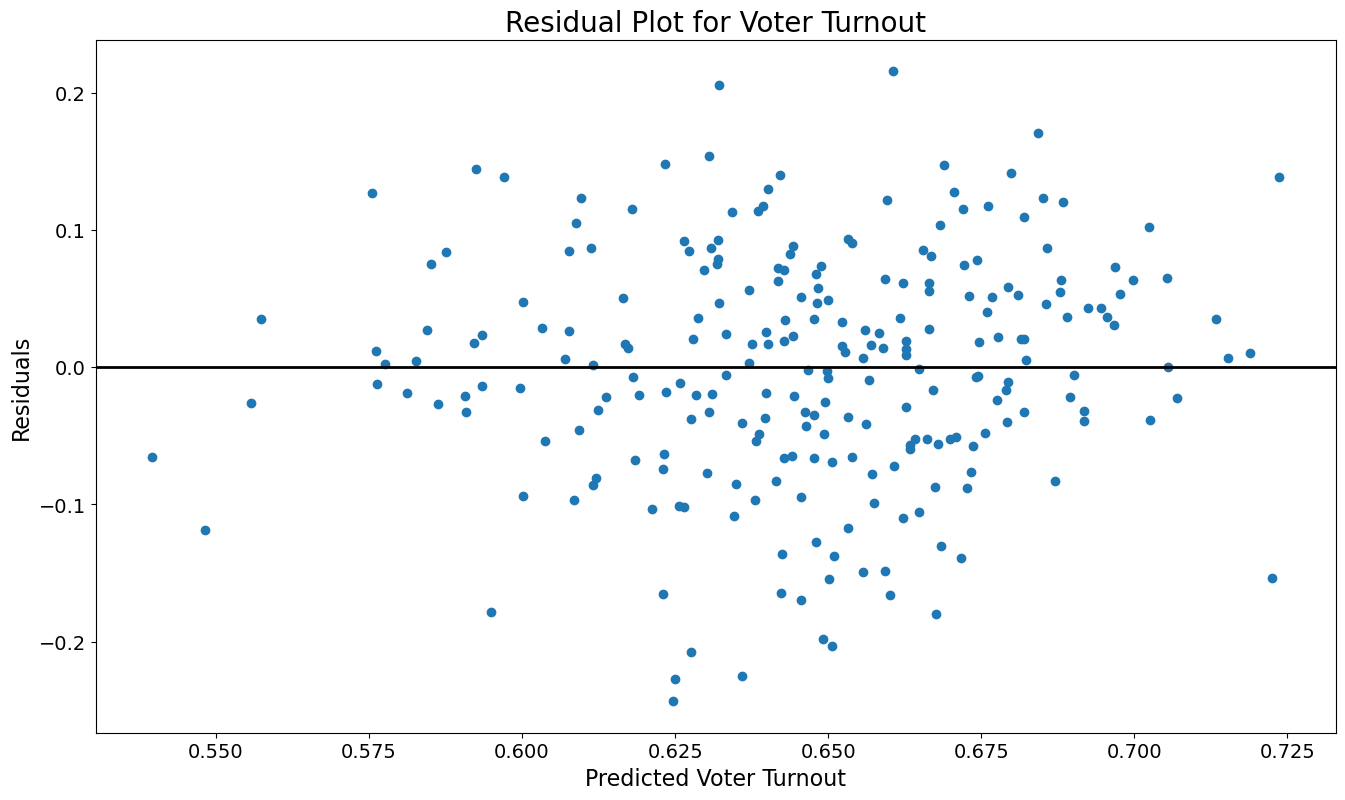

In [11]:
y1_resid = y1_test-y1_pred
plt.scatter(y1_pred, y1_resid)
plt.axhline(y=0, color='black')
plt.title("Residual Plot for Voter Turnout")
plt.xlabel("Predicted Voter Turnout")
plt.ylabel("Residuals")
plt.show()

After modeling a residual plot for the target variable, Voter Turnout, we can observe that the points appear to be similarly spread around the line throughout the graph, so the constant variance assumption appears to be satisfied. Additionally, there is no curve or pattern on the fitted vs. residual plot, so the linearity assumption is also satisfied. 

**Correlation Heat Map for Regressor Variables and Voter Turnout**

In [12]:
def correlation(x, y):
    '''
    Returns the sample Pearson Correlation Coefficient between arrays X and Y.
    '''
    mean_x = np.mean(x)
    mean_y = np.mean(y)
    std_x = x - mean_x
    std_y = y - mean_y

    numerator = np.sum(std_x * std_y)
    denominator = np.sqrt(np.sum(std_x*std_x)) * np.sqrt(np.sum(std_y*std_y))

    corr = numerator/denominator
    
    return corr

In [13]:
corrs = []

for col in infrastructural_discrimination:
    x3 = data["Voter Turnout"].values
    y3 = data[col].values
    corrs.append(correlation(x3, y3)) 
corrs

[-0.21540941828569293,
 -0.0352065271624871,
 -0.12375343933366671,
 -0.30845125774295074]

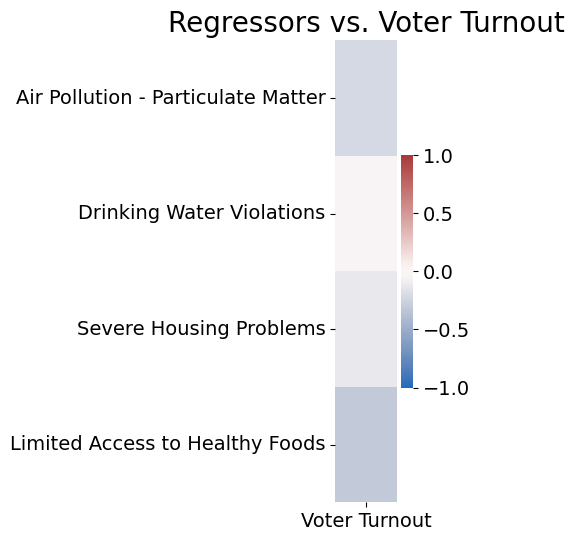

In [14]:
corrs = np.array(corrs)
plt.figure(figsize=(1, 6))
sns.heatmap(corrs[:, None],cmap="vlag",vmin=-1, vmax=1,center=0,)
plt.xticks([0.5], ['Voter Turnout'], rotation=0)
plt.yticks(np.arange(corrs.shape[0]) + 0.5,data.loc[:, infrastructural_discrimination].columns,rotation=0)
plt.title('Regressors vs. Voter Turnout')
plt.show()

The figure above showcases a vertical heatmap for each of the four regressor features and their respective correlation with the target variable, Voter Turnout. Each regressor demonstrates a neutral to negative correlation with "Voter Turnout." Air Pollution- Particulate Matter has a -0.2154 correlation, Drinking Water Violations has a -0.0352 correlation, Severe Housing Problems has a -0.12375 correlation, and Limited Access to Healthy Foods has a -0.30845 correlation. 

# Homeownership

**Linear Regression for Homeownership**

In [15]:
X = data[infrastructural_discrimination]
y2 = data['Homeownership']
X_train, X_test, y2_train, y2_test = train_test_split(X, y2, test_size = .1, random_state = 71)

In [16]:
model = LinearRegression()
model.fit(X_train, y2_train)

LinearRegression()

To begin our training phase we take in our four regressors, 'Air Pollution - Particulate Matter', 'Drinking Water Violations', 'Severe Housing Problems', 'Limited Access to Healthy Foods' within the infrastructural discrimination data subset, as well as our target feature 'Homeownership'. We conduct a train-test-split with a test size of 0.1, which means that we are going train our model with 90% of the input data (~2200 entries). We set our model to linear regression, and fit our training data to the model.

In [17]:
y2_pred = model.predict(X_test)

Our test phase involves determining predicted y-yalues from our testing data. We use our linear regression model that was created in our training phase to predict corresponding y-values for the input testing data.

In [18]:
print(r_squared(y2_pred, y2_test))

0.35404777783600483


This begins our evaluation phase. We compare the predicted y-values to our true y-values from our test data in multiple ways to determine the effectiveness of our model.

By computing the R squared value and getting 0.35, we see that there is a significant portion of the variation in Homeownership that is explained by the regression in infrastructural discrimination features.

In [19]:
print(rmse(y2_pred, y2_test))

0.06388615948372041


Continuing with the evaluation phase, we compute the root mean squared error (RMSE), the square root of the average of the squared differences between the observed and predicted values. The lower the value, the closer the model fits the data, so our value 0.063886 is a good indicator of our model's performance.

**Residual Plot for Homeownership**

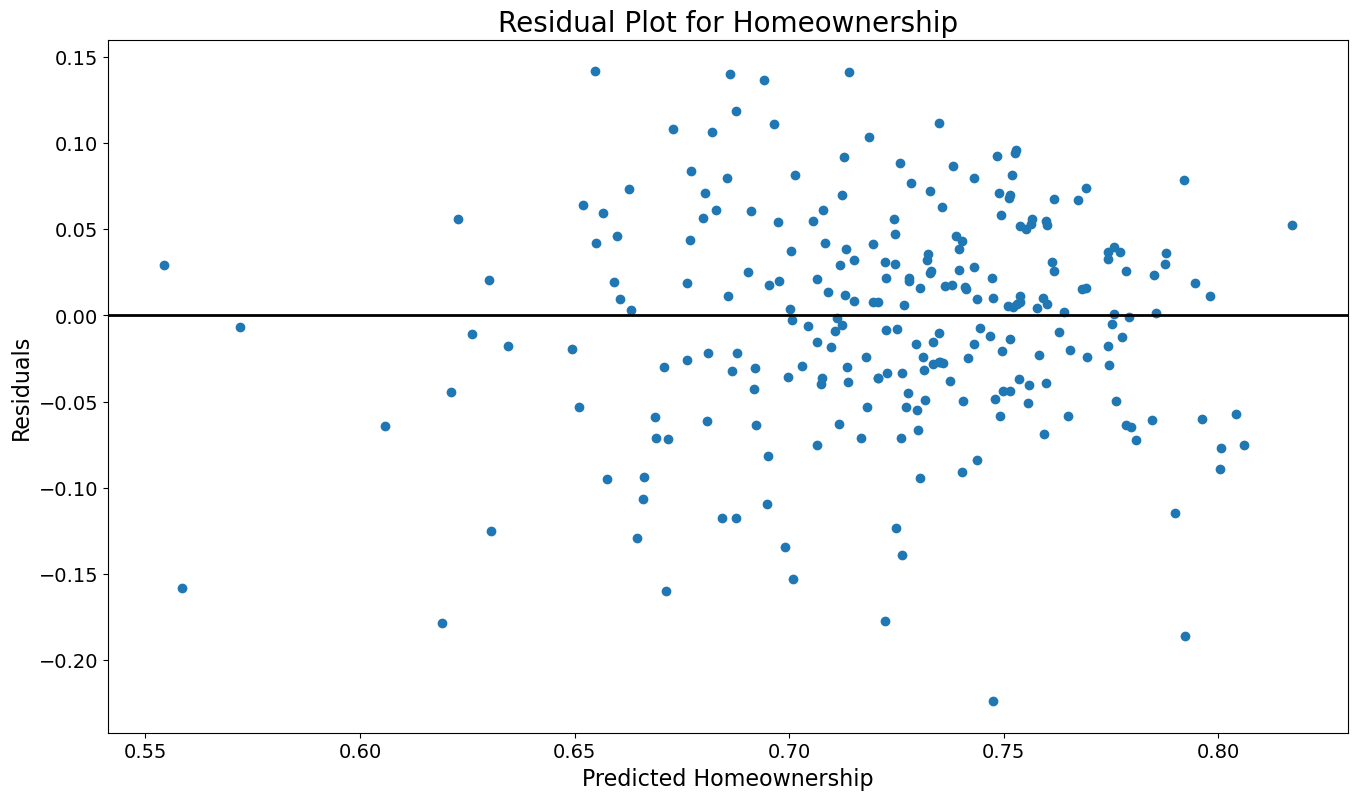

In [20]:
y2_resid = y2_test-y2_pred
plt.scatter(y2_pred, y2_resid)
plt.axhline(y=0, color='black')
plt.title("Residual Plot for Homeownership")
plt.xlabel("Predicted Homeownership")
plt.ylabel("Residuals")
plt.show()

After modeling a residual plot for the target variable, Homeownership, we can observe that the points appear to be similarly spread around the line throughout the graph, so the constant variance assumption appears to be satisfied. Additionally, there is no curve or pattern on the fitted vs. residual plot, so the linearity assumption is also satisfied.

**Correlation Heat Map for Regressor Variables and Homeownership**

In [21]:
corrs = []

for col in infrastructural_discrimination:
    x3 = data["Homeownership"].values
    y3 = data[col].values
    corrs.append(correlation(x3, y3))
corrs

[-0.1084466389375241,
 -0.08164158128783669,
 -0.5790534871452369,
 -0.21026513585746215]

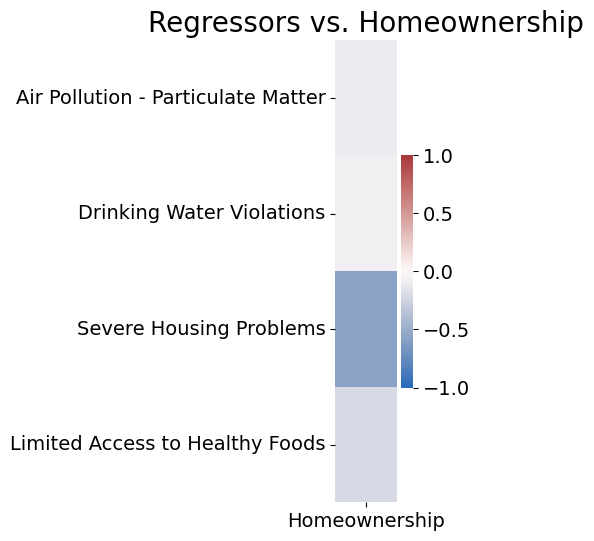

In [22]:
corrs = np.array(corrs)
plt.figure(figsize=(1, 6))
sns.heatmap(corrs[:, None],cmap="vlag",vmin=-1, vmax=1,center=0)
plt.xticks([0.5], ['Homeownership'], rotation=0)
plt.yticks(np.arange(corrs.shape[0]) + 0.5,data.loc[:, infrastructural_discrimination].columns,rotation=0)
plt.title('Regressors vs. Homeownership')
plt.show()

The figure above showcases a vertical heatmap for each of the four regressor features and their respective correlation with the target variable, Homeownership. Each regressor demonstrates a neutral to negative correlation with "Voter Turnout." Air Pollution- Particulate Matter has a -0.1084466 correlation, Drinking Water Violations has a -0.08164158 correlation, Severe Housing Problems has a -0.579053487 correlation, and Limited Access to Healthy Foods has a -0.210265 correlation. 

### Problem 6

**Write up!** Did you find anything interesting in [Problem 5](#Problem-5)? If you did, tell me about it. If you don't think you found anything interesting, keep looking. 

> **Hint**: Provide links to key figures in your discussion. See [this StackOverflow question](https://stackoverflow.com/questions/28080066/how-to-reference-a-ipython-notebook-cell-in-markdown) for details.

**Answer here:** (feel free to make multiple cells!)  
We notice that our models are effective for predicting Voter Turnout and Homeownership. This is based on R-squared values of 0.18 and 0.35 respectively, which indicates that the variations in our dependent variables are somewhat explained by our infrastructural independent variables. Additionally, our RMSEs are about 0.085 and 0.064 respectively. This means the standard deviations of the residuals are about 0.085 and 0.064, which is moderately large but still reasonable.

We also have strong residual plots, suggesting that a linear model is the proper fit for our analysis.

Upon calculating the correlations between our independent and dependent variables individually, we notice that some of our IVs are more correlated with our DVs than others. For example, Limited Access to Healthy Foods is most correlated with Voter Turnout of all of the IVs and is the second most correlated with Homeownership. This is our most predictive regressor. We also see that Severe Housing Problems is the second most correlated with Homeownership, and Air Pollution is relatively correlated with Voter Turnout. Drinking Water Violations are the weakest correlated across both dependent variables.

Our regressions and data exploration indicate that there is a significant relationship between counties' infrastructural discrimination and their political power. Although we can not prove causation through our study, our findings suggest that either infrastructural factors or political power might impact each other. If this is true, it would support our hypothesis that infrastructural discrimination lowers political power as measured by voter turnout and homeownership.

### Problem 7
One last step that we shouldn't skip is reviewing both our data analysis approach and also the data acquisition method. 

**Write up!** Are there any shortcommings and/or **ethical issues** related to the way you used this data or formed your conclusions?
* Who are the stakeholders?
* How could someone other than yourself be impacted by any ethical issues arising from your analysis/work/product?
* Can you propose a way to resolve the issue(s)?

**Answer here:** (feel free to make multiple cells!)

**Are there any shortcommings and/or ethical issues related to the way you used this data or formed your conclusions?**

One possible ethical issue could be that we did not control for income or race. Ignoring these factors can be problematic because it ignores possible structural inequalities that could impact our DVs. Ethically, it’s important to include such factors responsibly to clarify the role of systemic disparities.

**Who are the stakeholders? How could someone other than yourself be impacted by any ethical issues arising from your analysis/work/product?**

Politicians are potential stakeholders for our analysis. These findings can have potential impact for the way they conduct their campaigning. Unfortunately, our findings might lead these politicians to somewhat ignore these counties rather than pay more attention to them, which would lead to significant ethical issues as a result of this analysis as it would be actively harming rather than helping people.

**Can you propose a way to resolve the issue(s)?**

We could be more careful about who this analysis is geared towards/released to. While releasing this to politicians might be detrimental, there may be other parties that could benefit from this data and also contribute to alleviating these issues. One stakeholder that comes to mind would be higher-ups who work in infrastructure. Our analysis could provide motivation for people in positions with civic planning power to put in equitable efforts regarding infrastructural decisions.

Let's conclude with thinking about imporvements for the future! 

**Write up!** There are often times where the data you need doesn't exist (yet) and you need to go collect it. Based on your analysis of the data set, which features were informative and which weren't? What information that was missing from this dataset do you think would be helpful to have for next time?

**Answer here:** (feel free to make multiple cells!)

Some features that were helpful to us were Limited Access to Healthy Foods, Air Pollution - Particulate Matter, and Severe Housing Problems, while Drinking Water Violations was not particularly helpful. I think a more effective measure for political power could be helpful, such as a subjective or measured score for relative perceived political power in a given county, as Voter Turnout and Homeownership, while useful, are not perfect for measuring the political power of a county.

### Problem 8

**Write up!** Did you use any generative AI tools (ChatGPT, Copilot, etc.) for this project?
* Which generative AI tools did you use?
* How did you them? 
* How did you ensure that your project reflects your own understanding?
* What challenges or adjustments did you encounter when using generative AI (refining prompts, verifying accuracy, revising outputs, etc.)?

**Answer here:** (feel free to make multiple cells!)

We did not use generative AI tools for this project as we mirrored the graphing methods taught in class, referring back to the homeworks and labs as needed. For example, homework 2 was especially helpful for us when making the correlation heat map. Additionally, we used the pandas documentation for help converting our numeric and raw value columns to a numeric data type. We placed a great deal of emphasis on ensuring our project both reflects and expands upon the course content, reinforcing our understanding of the machine learning workflow, good data visualization practices, and ethical considerations. Additionally, we chose a topic that reflects much of our own personal interest in environmental justice, given the history of infrastructural discrimination causing pollution and adverse health problems in minority communities. 

And that's it! Remember to review your work and make sure it is well presented and organized. Not everyting you coded up needs to remain in your submission. **[Does [this cell] spark joy?](https://i.kinja-img.com/gawker-media/image/upload/s--iW_3HGbT--/c_scale,dpr_2.0,f_auto,fl_progressive,q_80,w_800/oruf4oavtj5vpmvaquew.jpg)** You are always trying to communicate your findings to somebody, _maybe even yourself_. 

> **Final Grading Note/Reminder**: Your work will be graded for _creativity_, _aesthetics_, _readability_, _style_, and _cleanlines_. So, carefully document your code and use descriptive/intuitive variable names. For write-ups use consice and clear language like in a written project report. Be creative in the questions you ask/hypothesis you pose as well as in the plots you use and select visulatizations and colors that make for a plesant and intuitive viewing expereince. The goal of a good visualization is that the viewer will quickly understand your figures. 

### Submission instructions
* Check to make sure that your code runs without error on a fresh kernel. Within jupyter, **Kernel -> Restart & Run All**. 
* **Save your notebook!**
* Submit this Python notebook, including your answers in the code cells as homework submission. Be sure to add your partner to the submission as well.
* After submitting, navigate to the **code tab** to view your submission. Verify that all your write-ups, markdown cells, and visualizations appear correctly on Gradescope. This is the **exact** view the graders will see when grading your work, so make sure that everything looks as expected.

In [23]:
grader.check("hw6")

hw6 results: All test cases passed!

<!-- END QUESTION -->

